In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage import img_as_float
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
# 474 x 713
parrot_image = imread('parrot.jpg')
parrot_image = img_as_float(image)

In [12]:
x, y, z = parrot_image.shape
objects_features_matrix = np.reshape(parrot_image, (x * y, z))

In [115]:
clf = KMeans(n_clusters=15, init='k-means++', random_state=241)
clf.fit(objects_features_matrix)
pred = clf.predict(objects_features_matrix)
print 'Done'

Done


In [138]:
import math

def MSE(image_true, image_pred):
    l = len(image_true);
    I = image_true
    K = image_pred
    return 1.0/l * np.sum(np.square(1.*I-1.*K))

def PSNR(image_true, image_pred):
    mse = (MSE(image_true, image_pred))
    
    mx = 1.0 * max(image_true)
    print mx
    print mse
    print np.sqrt(mse)
    return 20 * math.log(mx/np.sqrt(mse), 10);

In [102]:
print parrot_image.shape
print objects_features_matrix.shape
print pred.shape

(474, 713, 3)
(337962, 3)
(337962,)


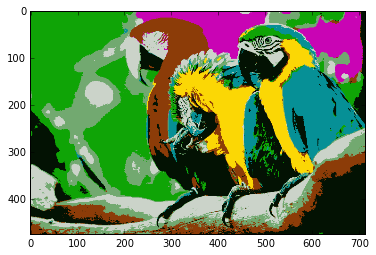

In [77]:
# Median predict
X = objects_features_matrix

X_median = objects_features_matrix
for i in range(clf.n_clusters):
    X_median[pred==i] = np.median(X[pred==i], axis=0)
plt.imshow(np.reshape(X_median, (parrot_image.shape)));

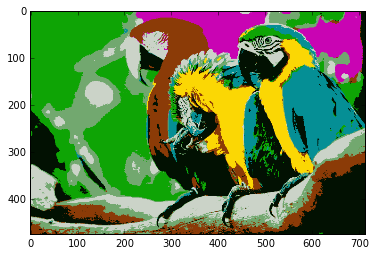

In [94]:
# Mean predict
X = objects_features_matrix

X_mean = objects_features_matrix
for i in range(clf.n_clusters):
    X_mean[pred==i] = np.mean(X[pred==i], axis=0)
plt.imshow(np.reshape(X_mean, (parrot_image.shape)));

In [113]:
# Labels
plt.imshow(np.reshape(clf.labels_, (x,y)));

TypeError: only length-1 arrays can be converted to Python scalars

In [139]:
# y_true = np.array([np.median(x) for x in objects_features_matrix])
PSNR(y_true, pred)
# pred.shape

0.843137254902
13.6740494544
3.69784389265


-12.84100587298495